# Get Labels

In [1]:
from starling_rhythm.utils.paths import PROCESSED_DIR

In [2]:
bID = 's_b1555_22'

In [3]:
bID_DIR = PROCESSED_DIR / bID
pickle = list(bID_DIR.glob('*.pickle'))[0]

## Import

In [4]:
import pandas as pd

In [5]:
syllable_df = pd.read_pickle(pickle)

In [6]:
syllable_df

,file,onsets_ms,offsets_ms,audio,rate,spectrogram
0,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,0.754,1.826,"[-0.058823529411764705, -0.058823529411764705,...",48000,"[[0, 117, 105, 125, 104, 28, 11, 40, 33, 18, 1..."
1,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,1.828,2.338,"[0.0, 0.006493506493506494, 0.0129870129870129...",48000,"[[6, 6, 7, 15, 10, 8, 7, 6, 7, 7, 6, 11, 10, 9..."
2,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,3.680,4.537,"[-0.001941747572815534, -0.000970873786407767,...",48000,"[[15, 21, 17, 16, 60, 54, 14, 24, 21, 15, 15, ..."
3,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,5.632,6.140,"[0.058823529411764705, 0.058823529411764705, 0...",48000,"[[7, 7, 0, 54, 81, 12, 21, 18, 9, 7, 3, 42, 13..."
4,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,6.162,6.284,"[-0.08771929824561403, -0.05263157894736842, 0...",48000,"[[2, 2, 2, 2, 2, 21, 0, 2, 2, 4, 2, 2, 2, 2, 3..."
...,...,...,...,...,...,...
60376,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,30.155,30.803,"[0.0010766194150367845, 0.0008971828458639871,...",48000,"[[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, ..."
60377,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,30.905,31.609,"[-0.003228410008071025, -0.003228410008071025,...",48000,"[[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, ..."
60378,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,31.678,32.390,"[-0.0041841004184100415, -0.004184100418410041...",48000,"[[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, ..."
60379,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,32.429,32.542,"[-0.001201923076923077, -0.001201923076923077,...",48000,"[[2, 2, 2, 2, 2, 5, 2, 8, 23, 21, 7, 1, 2, 2, ..."


## Prepare UMAP

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms
from avgn.visualization.spectrogram import draw_spec_set
from avgn.visualization.quickplots import draw_projection_plots
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

/tmp/ipykernel_6246/1922547297.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
2022-11-10 17:02:03.087810: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.2/lib64
2022-11-10 17:02:03.087864: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-10 17:02:03.125124: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-10 17:02:03.795156: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [8]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [9]:
## get specs and cluster them
specs = list(syllable_df.spectrogram.values)
specs_flattened = flatten_spectrograms(specs)
fit = umap.UMAP(min_dist = 0.25, verbose = True)
z = list(fit.fit_transform(specs_flattened))
syllable_df['umap'] = z

UMAP(min_dist=0.25, verbose=True)
Thu Nov 10 17:02:05 2022 Construct fuzzy simplicial set
Thu Nov 10 17:02:05 2022 Finding Nearest Neighbors
Thu Nov 10 17:02:05 2022 Building RP forest with 17 trees
Thu Nov 10 17:02:06 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Nov 10 17:02:25 2022 Finished Nearest Neighbor Search
Thu Nov 10 17:02:29 2022 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:23]


Thu Nov 10 17:03:13 2022 Finished embedding


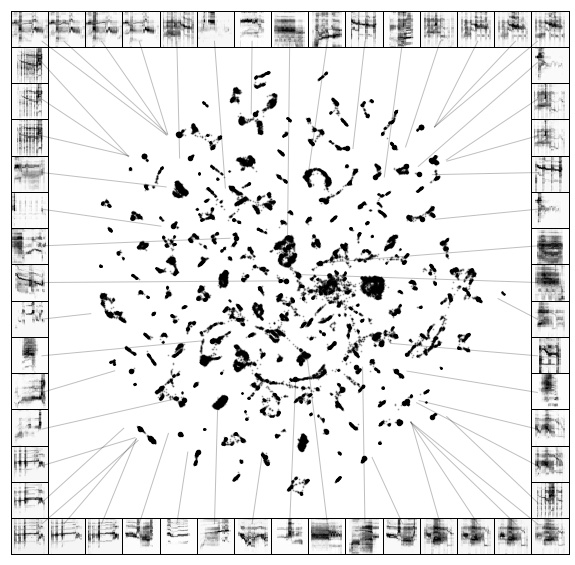

In [10]:
scatter_spec(
        np.vstack(z),
        specs,
        column_size=15,
        #x_range = [-5.5,7],
        #y_range = [-10,10],
        pal_color="hls",
        color_points=False,
        enlarge_points=20,
        figsize=(10, 10),
        scatter_kwargs = {
            #'labels': list(indv_df.phrase.values),
            'alpha':0.25,
            's': 1,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':1,
            'ls':"solid",
            'alpha':0.25,
        },
        draw_lines=True
    );
plt.show()

## HDBSCAN Clustering

In [11]:
import hdbscan

In [12]:
z = np.vstack(syllable_df.umap.values)
min_cluster_size = int(len(z) * 0.001)
print(min_cluster_size)
clusterer = hdbscan.HDBSCAN(
    min_cluster_size = min_cluster_size
).fit(z)
syllable_df.loc[:, 'hdbscan_labels'] = list(clusterer.labels_)

60


/home/AD/j8xing/avgn_paper/avgn/visualization/projections.py:76: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  colors = np.array([lab_dict[i] for i in labels])


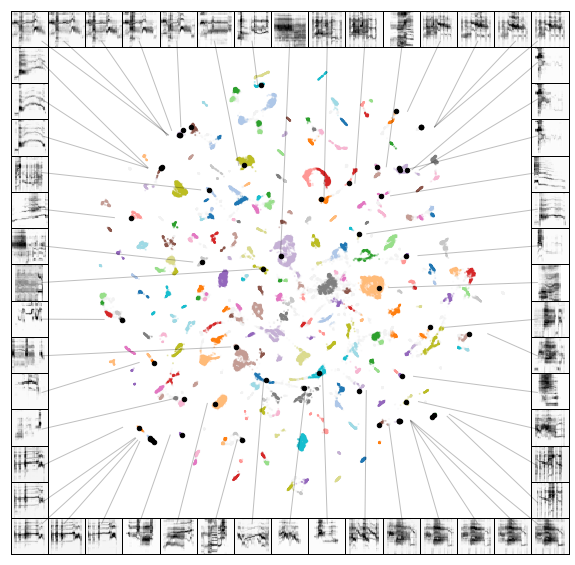

In [13]:
scatter_spec(
        np.vstack(z),
        specs,
        column_size=15,
        #x_range = [-5.5,7],
        #y_range = [-10,10],
        pal_color="hls",
        color_points=False,
        enlarge_points=20,
        figsize=(10, 10),
        scatter_kwargs = {
            'labels': list(syllable_df.hdbscan_labels.values),
            'alpha':0.25,
            's': 1,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':1,
            'ls':"solid",
            'alpha':0.25,
        },
        draw_lines=True
    );
plt.show()

In [22]:
syllable_df_trimmed = syllable_df.drop(columns = ['audio', 'spectrogram', 'rate'])

In [23]:
len(np.unique(syllable_df['hdbscan_labels'].values))

255

## Pickle Dataframe

In [24]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir

In [25]:
SAVE_PATH = PROCESSED_DIR / bID /'syllable_df_labels.pickle'
ensure_dir(SAVE_PATH)

In [26]:
syllable_df_trimmed.to_pickle(SAVE_PATH)